<a href="https://colab.research.google.com/github/lin3372/600_graph_neural_net/blob/main/books/Graph_Machine_Learning/02_01_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install node2vec
!pip install karateclub

     |████████████████████████████████| 62 kB 545 kB/s 
     |████████████████████████████████| 1.8 MB 10.9 MB/s 
     |████████████████████████████████| 24.1 MB 82.0 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.2-py3-none-any.whl size=97744 sha256=e343803ff85dbea13e4829504e6ac9c9f4c2fbe275613667f4aaff64ce6a2bb3
  Stored in directory: /root/.cache/pip/wheels/14/4b/99/abc777e42da28bc43b6959267f4f1c5eee06814a5c608a9ed2
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149867 sha256=6a723b63b92f842c00147f76ab71f12d7e2c54a82e8df403298e000dc75ba3d5
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built karateclub python-Levenshtein
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import networkx as nx # networkx == 2.5 
import node2vec as ndVec
import karateclub as karateC
#from node2vec import Node2Vec # node2vec==0.3.3

print(f"nx={nx.__version__}")
print(f"node2vec={ndVec.__version__}")
#print(f"karateclub={karateC.__}")

nx=2.6.3
node2vec=0.4.3


Jupyter==1.0.0
networkx==2.5
matplotlib==3.2.2
node2vec==0.3.3
karateclub==1.0.19
scipy==1.6.2

In [3]:
import matplotlib.pyplot as plt
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Node2Vec example

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.21it/s]


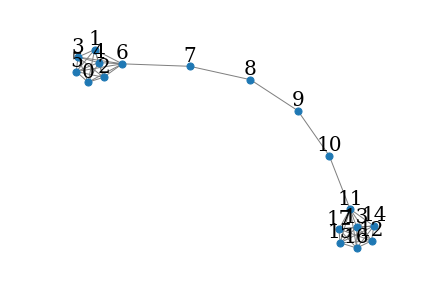

In [4]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=7, m2=4)
draw_graph(G, nx.spring_layout(G))

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)

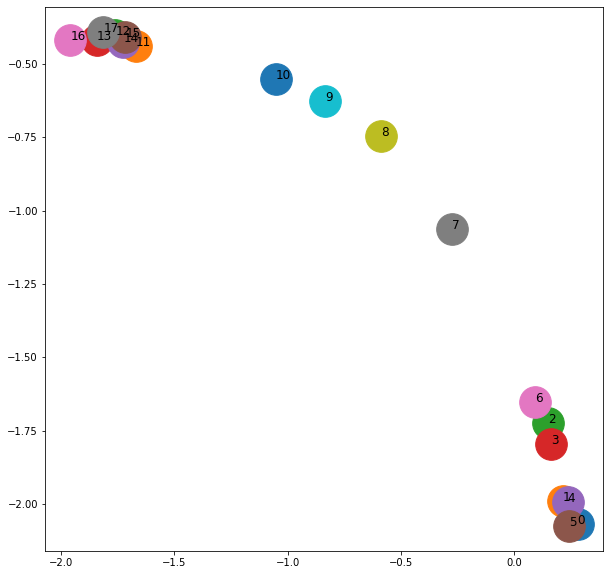

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)


## Edge2Vec example

In [6]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

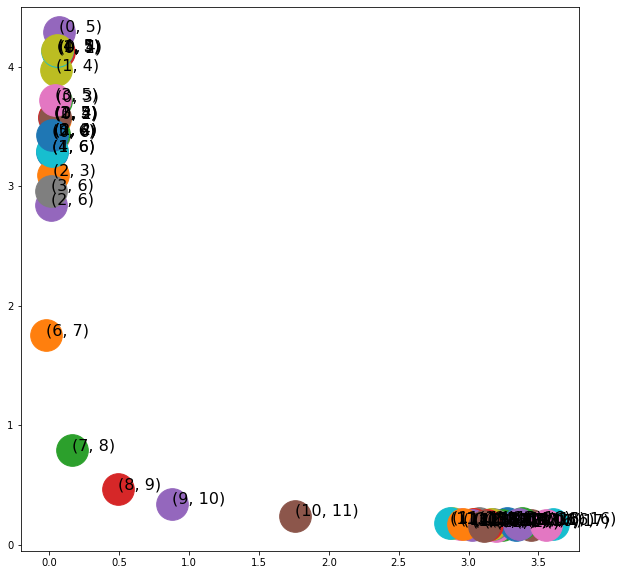

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

## Graph2Vec Example

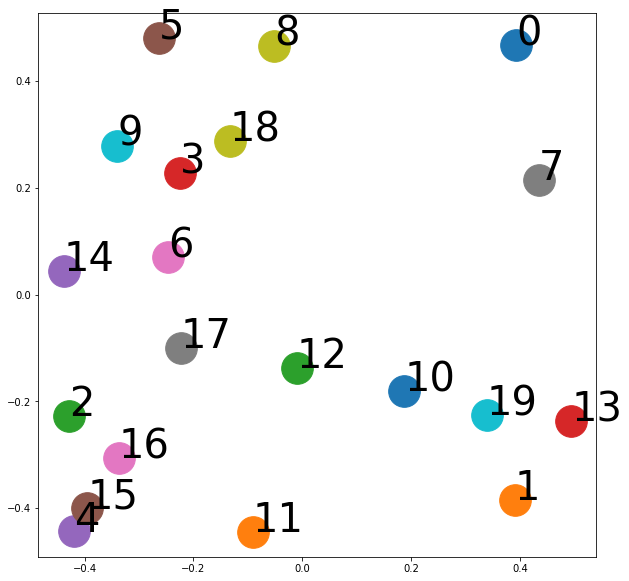

In [8]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)